In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

!pip install docx2txt
!pip install chart_studio
!pip install PyPDF2==2.12.1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import docx2txt
from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px

import chart_studio.plotly as py

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


EDA [Explainatory Data Analysis]

In [5]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
df.shape

(962, 2)

In [8]:
df.dtypes

Category    object
Resume      object
dtype: object

In [9]:
df[df.isna().any(axis=1) | df.isnull().any(axis=1)]

,Category,Resume


In [10]:
df.nunique()

Category     25
Resume      166
dtype: int64

In [11]:
df['length'] = df['Resume'].str.len()
df['length'].describe()

count      962.000000
mean      3160.364865
std       2886.528521
min        142.000000
25%       1217.250000
50%       2355.000000
75%       4073.750000
max      14816.000000
Name: length, dtype: float64

Text(0.5, 1.0, 'Resume length distribution')

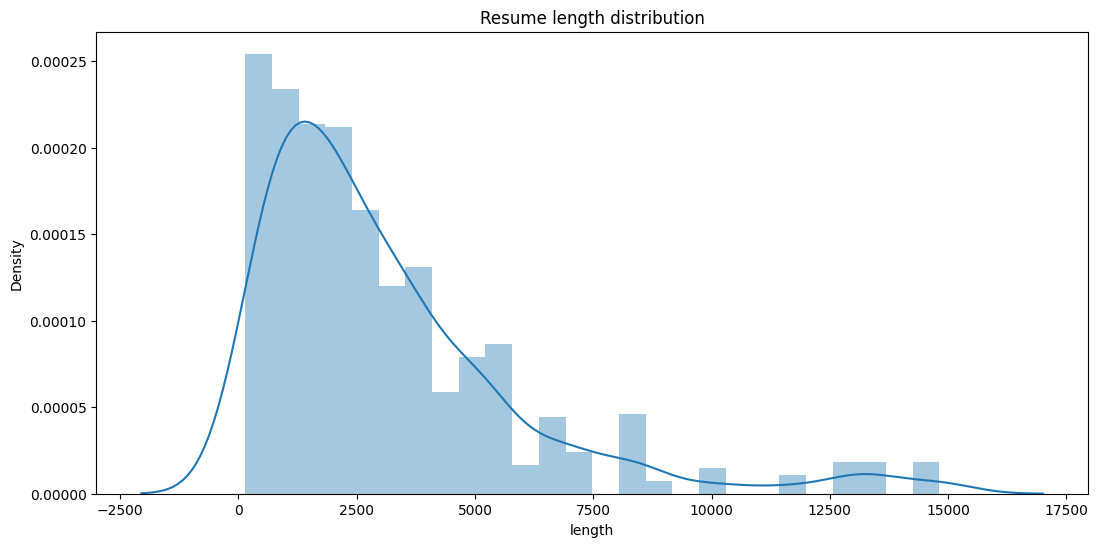

In [12]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length']).set_title('Resume length distribution') 


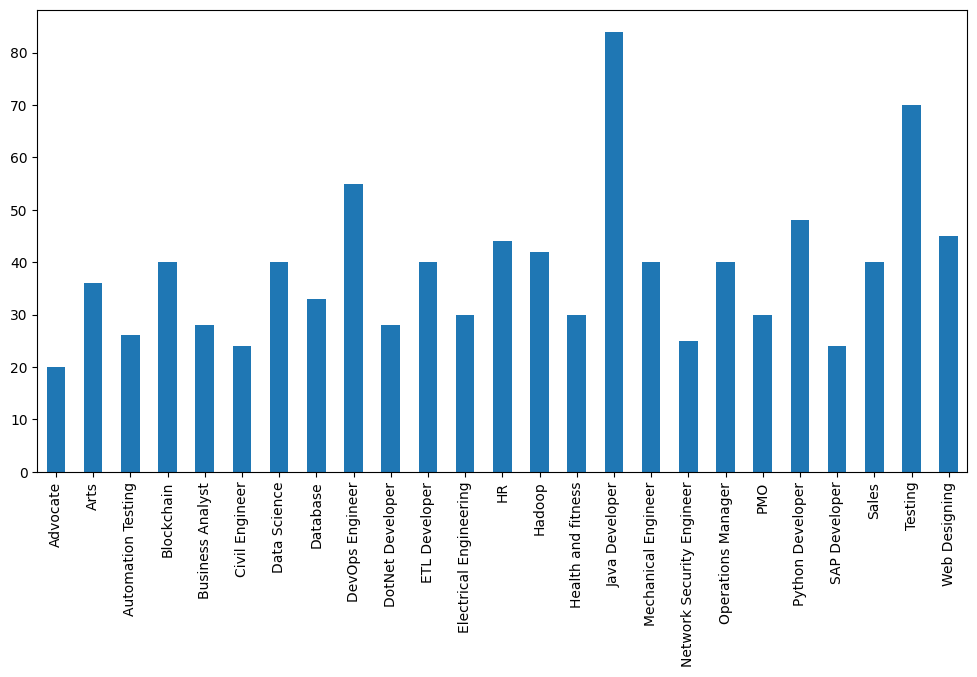

In [13]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

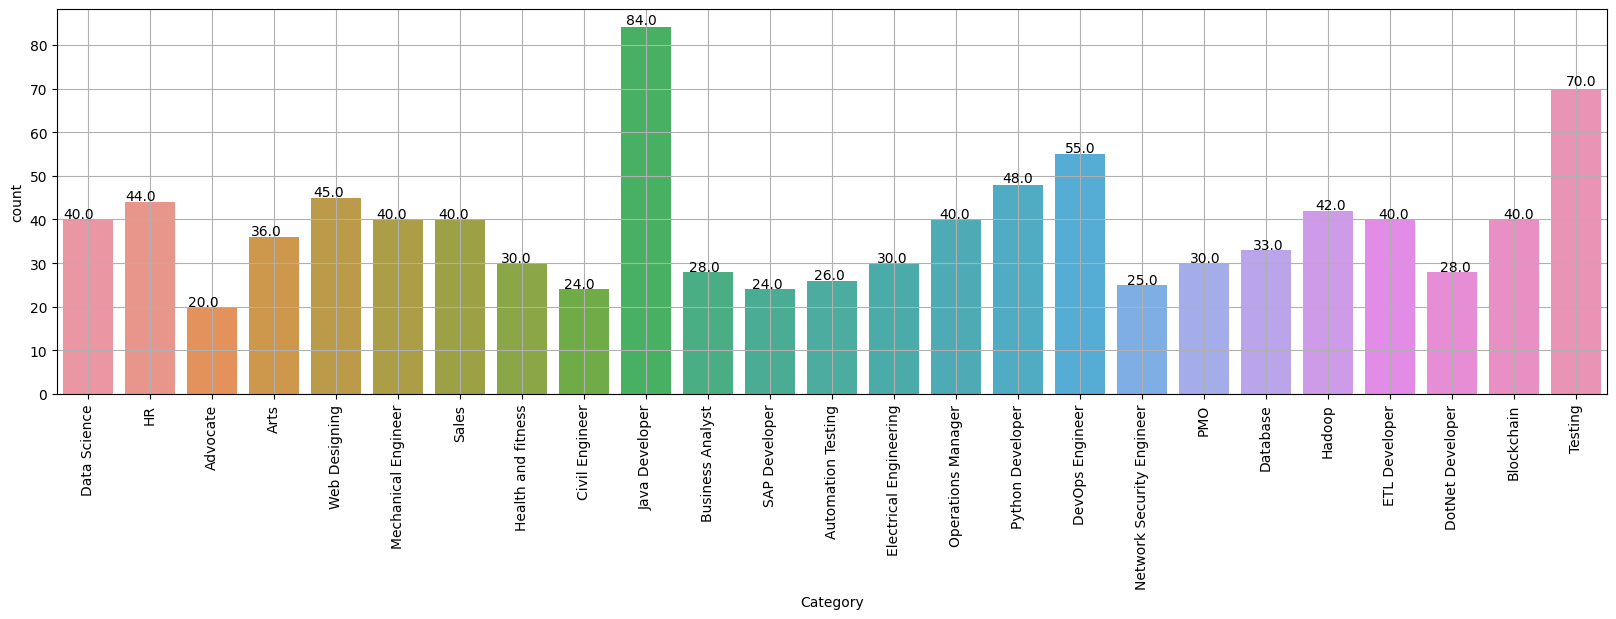

In [14]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()
sns.color_palette("husl", 9)

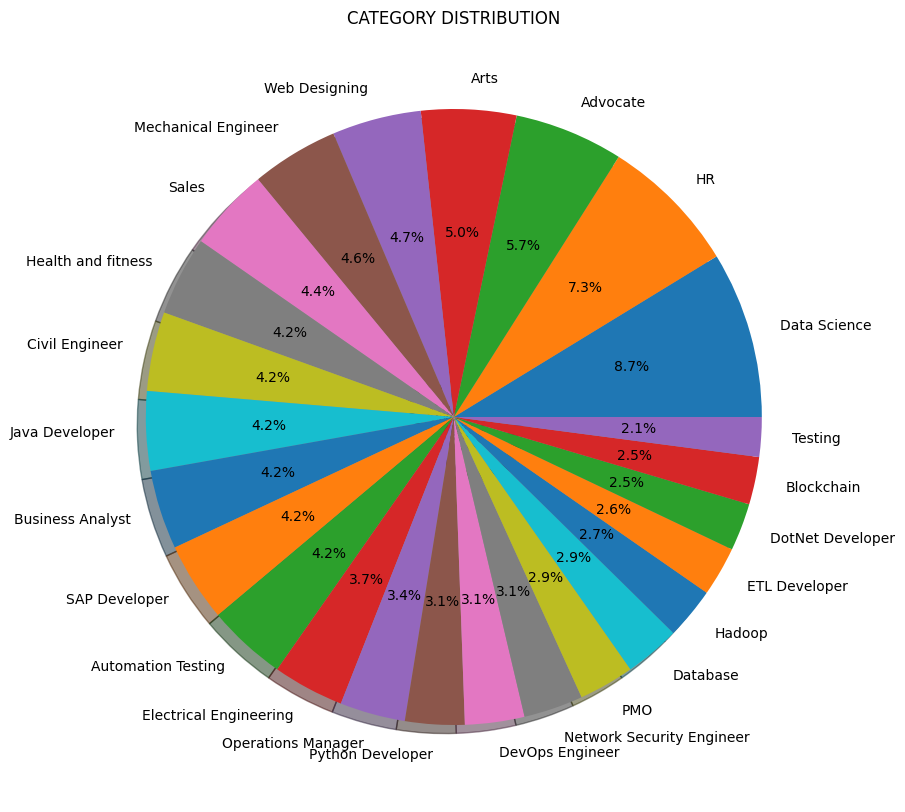

In [15]:
from matplotlib.gridspec import GridSpec
targetCounts =df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)




cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

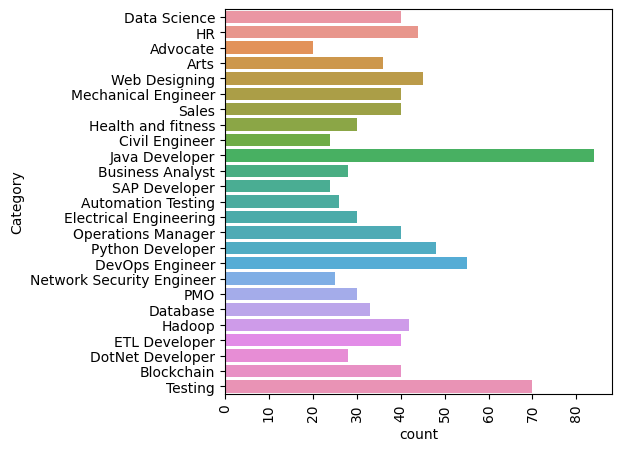

In [16]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, )
sns.color_palette("husl", 9)

In [18]:
fig = px.histogram(
    df, x="Category",
    color = 'Category', 
    title="Distribution of Jobs Categories"
)
fig.show()
sns.color_palette("husl", 9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

In [19]:
df['Category'].value_counts()[:3].index

Index(['Java Developer', 'Testing', 'DevOps Engineer'], dtype='object')

Visualizing most commonly used words in top 3 count Resumes


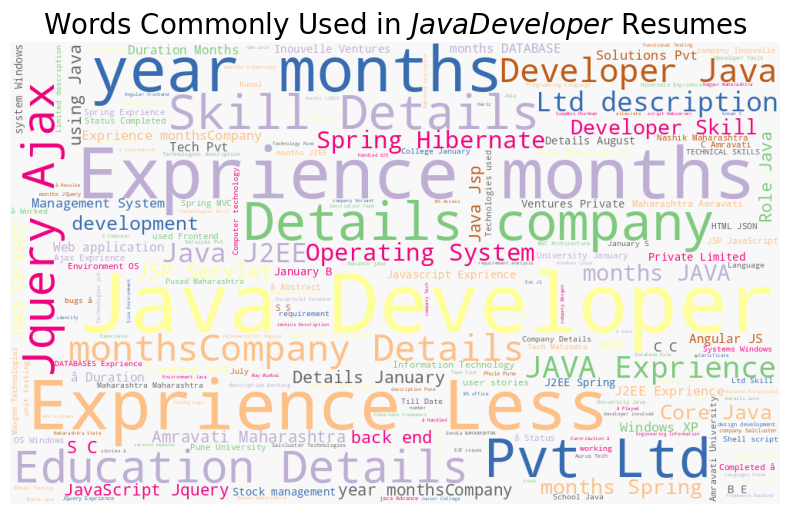

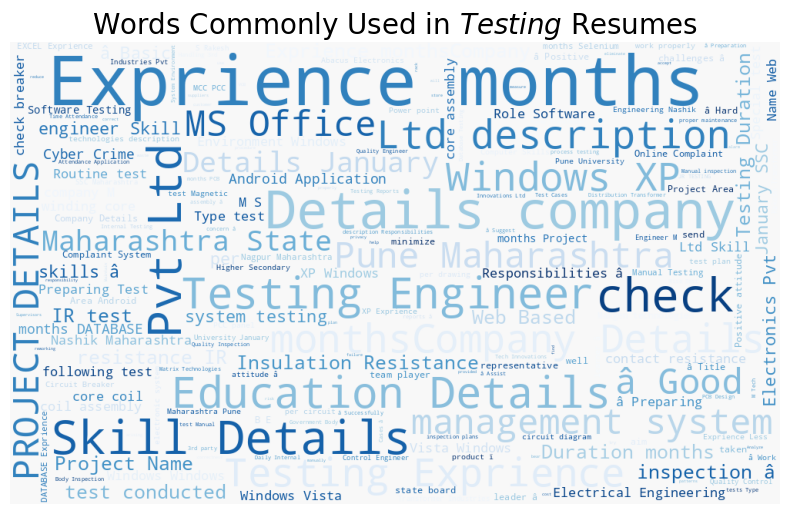

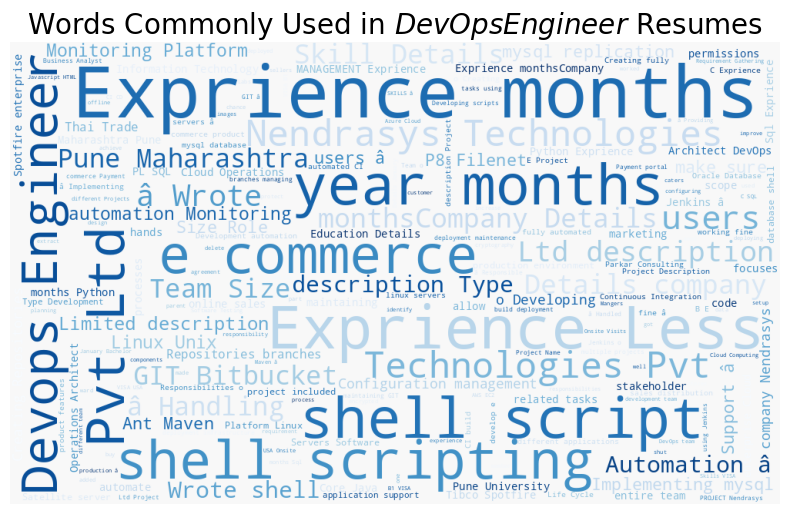

In [20]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

Visualizing most commonly used words in top 3 lowest count Resumes¶


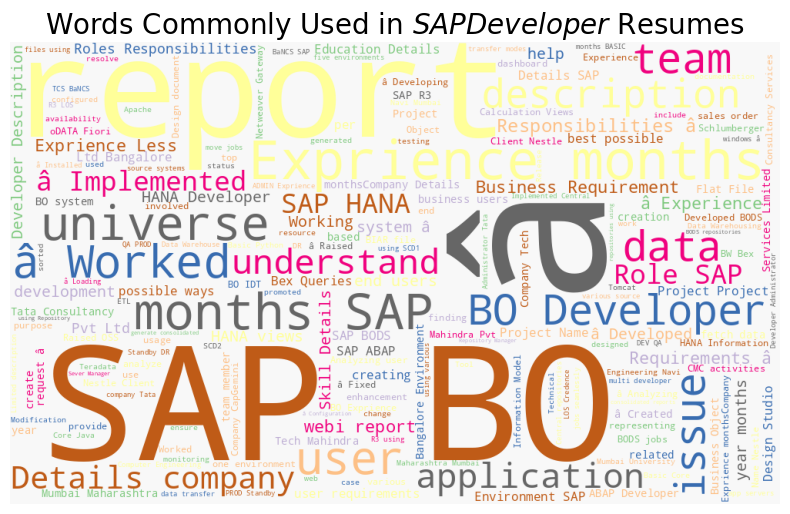

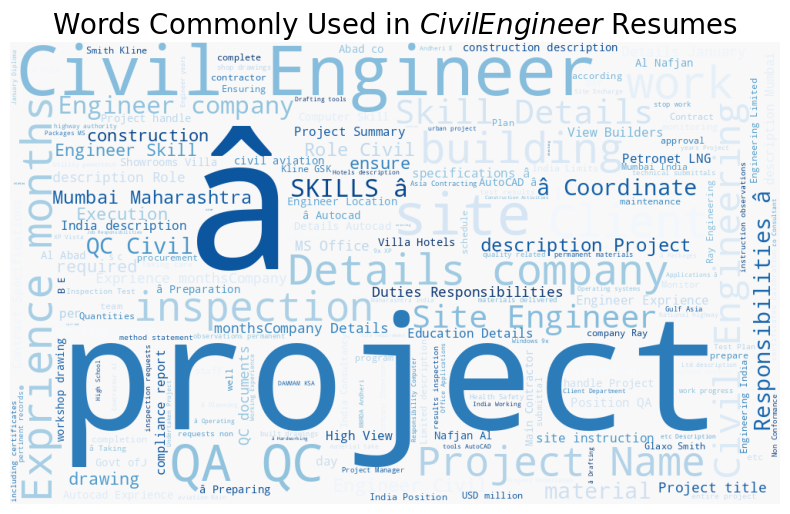

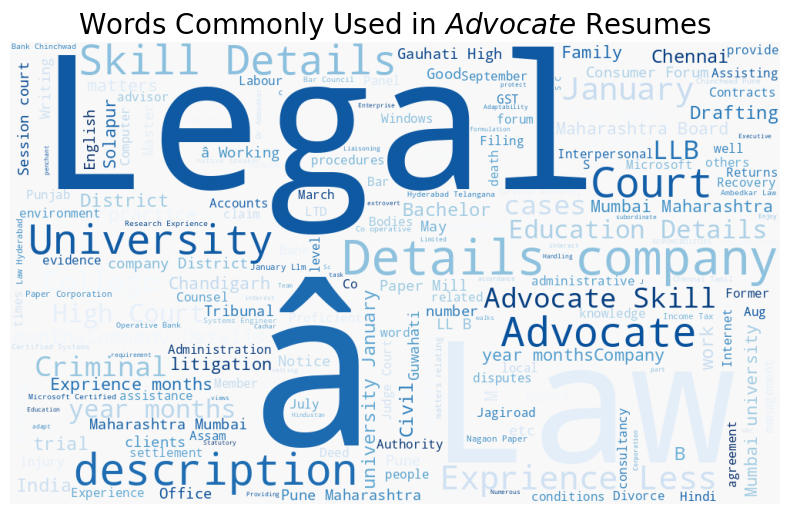

In [21]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

Visiualizing the word cloud, we can see that there are frequent character like ( â ) which should be cleaned before traning our model.


Processing data

In [22]:
resumeDataSet = df.copy()
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,length,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,4786,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,1268,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",1871,
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6995,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",452,


In [23]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

Visualizing after cleaning Resumes


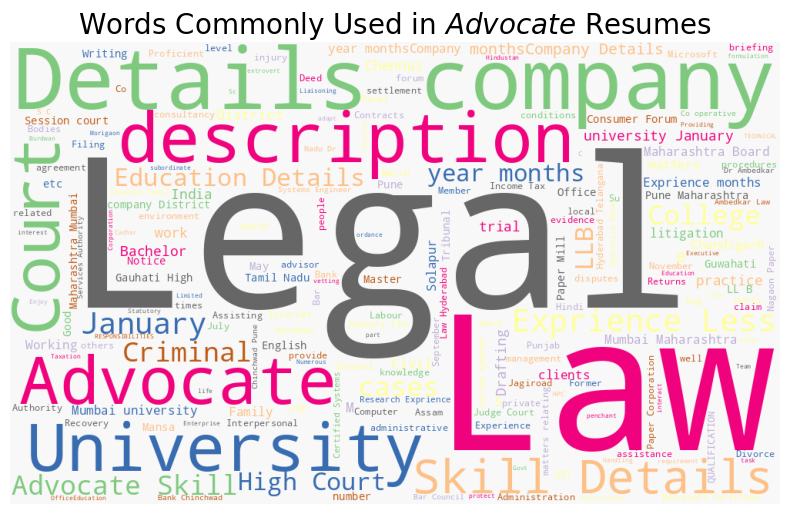

In [24]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = resumeDataSet['Category'].value_counts()[-1:].index
for label, cmap in zip(top_jobs, a):
    text = resumeDataSet.query("Category == @label")["cleaned_resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()


Encoding labels into different values¶


In [25]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [26]:
resumeDataSet.head()

,Category,Resume,length,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,4786,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,1268,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",1871,Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6995,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",452,Education Details MCA YMCAUST Faridabad Haryan...


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [28]:
from sklearn import tree
from sklearn.metrics import accuracy_score
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc2 = accuracy_score(y_test, y_pred)
print("accuracy is: ",acc2)

accuracy is:  1.0


In [29]:
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.95
Accuracy of KNeighbors Classifier on test set: 0.94


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=7)
knc = knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
acc3 = accuracy_score(y_test, y_pred)
print("accuracy is: ",acc3)

accuracy is:  0.9792746113989638


knn using OneVsRestClassifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [32]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


linear model

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

In [41]:
pred = model.predict(X_test)
flat_array = pred.flatten()

In [42]:
print(model.score(X_train, y_train))
acc = model.score(X_test, y_test)
print("accuracy is: ",acc)

0.999999999985523
accuracy is:  0.9993446354700979


In [43]:
class JobPredictor:
    def __init__(self) -> None:
        self.le = le
        self.word_vectorizer = word_vectorizer
        self.clf = clf

    def predict(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted = self.clf.predict(feature)
        resume_position = self.le.inverse_transform(predicted)[0]
        return resume_position

    def predict_proba(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted_prob = self.clf.predict_proba(feature)
        return predicted_prob[0]

In [44]:
job_description = """
Exposure to corporate environments
Critical thinking & problem-solving Skills
Increased hands-on experience in Python, Scala, R, SQL, SharePoint, Power BI/Tableau
Process and analyze industrial level data on big data platforms including Hadoop, TensorFlow, Spark, CUDA and more
Understanding of advanced Statistics, Probability, Machine and Deep Learning algorithms
Understanding of Data Warehouse principles and best practices
Ability to draw insights from enriched content data set that are actionable for the business
Design, develop, and implement novel deep learning, computer vision and language modeling algorithms for unique use cases
Design and build novel/custom neural networks architectures
Evaluate accuracy and quality of the designed models as well as data sources

"""

In [45]:
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Data Science'

In [66]:
text_tokenizer= WhitespaceTokenizer()
remove_characters= str.maketrans("", "", "±§!@#$%^&*()-_=+[]}{;'\:,./<>?|")
cv = CountVectorizer()

resume_docx = docx2txt.process('onkar.docx')

#takes the texts in a list
text_docx= [resume_docx, job_description]
#creating the list of words from the word document
words_docx_list = text_tokenizer.tokenize(resume_docx)
#removing speacial charcters from the tokenized words 
words_docx_list=[s.translate(remove_characters) for s in words_docx_list]
#giving vectors to the words
count_docx = cv.fit_transform(text_docx)
#using the alogorithm, finding the match between the resume/cv and job description
similarity_score_docx = cosine_similarity(count_docx)
match_percentage_docx= round((similarity_score_docx[0][1]*100),2)
f'Match percentage with the Job description: {match_percentage_docx}'

'Match percentage with the Job description: 22.2'

# installing pyreparser

In [62]:
!pip install pyresparser
!pip install spacy==2.3.5
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 21.6 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.6
    Uninstalling srsly-2.4.6:
      Successfully uninstalled srsly-2.4.6
  Attempting uninstall: 

# Extracting Information from resume

In [74]:
from pyresparser import ResumeParser
data = ResumeParser('onkar.pdf').get_extracted_data()
data
print('Name: ',data['name'])
print('Email: ',data['name'])
print('Skills: ',data['skills'])
print('College name: ',data['college_name'])
print('Degree: ',data['degree'])
print('Designation: ',data['designation'])
print('Experience: ',data['experience'])
print('Company Names: ',data['company_names'])
print('Total Experience: ',data['total_experience'])

Name:  Onkar Waghmode
Email:  Onkar Waghmode
Skills:  ['Js', 'Website', 'Design', 'Ui', 'Engineering', 'Programming', 'Python', 'Html', 'Javascript', 'Css', 'Ux', 'Technical', 'C++']
College name:  None
Degree:  None
Designation:  ['Technical Coordinator']
Experience:  []
Company Names:  None
Total Experience:  0.0


In [67]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = match_percentage_docx,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Match with JD"}))

fig.show()

In [68]:
job_predictor = JobPredictor()
resume_position = job_predictor.predict(resume_docx)

chart_data = pd.DataFrame({
    "position": [cl for cl in job_predictor.le.classes_],
    "match": job_predictor.predict_proba(resume_docx)
})

fig = px.bar(chart_data, x="position", y="match",
                title=f'Resume matched to: {resume_position}')
fig.show()


Multiple Resume Screener


In [75]:
uploaded_files = ['Shreya Dhurde resume  (1).docx',
                  'onkar.docx',
                  'soham.docx',
                  'OMG_Resume_v03.docx'
                 ]
job_predictor = JobPredictor()
job_positions = {x: 0 for x in [cl for cl in job_predictor.le.classes_]}
match_percentage = {}
for uploaded_file in uploaded_files:
    resume_docx = docx2txt.process(uploaded_file)
    resume_position = job_predictor.predict(resume_docx)
    job_positions[resume_position] += 1

#     job_description= docx2txt.process("temp_jd.docx")
    text_docx= [resume_docx, job_description]
    words_docx_list = text_tokenizer.tokenize(resume_docx)
    words_docx_list=[s.translate(remove_characters) for s in words_docx_list]
    count_docx = cv.fit_transform(text_docx)
    similarity_score_docx = cosine_similarity(count_docx)
    match_percentage_docx= round((similarity_score_docx[0][1]*100),2)
    match_percentage[uploaded_file.split('/')[-1]] = match_percentage_docx

In [76]:
match_chart_data = pd.DataFrame({
    "document": match_percentage.keys(),
    "percentage": match_percentage.values()
})

fig = px.bar(match_chart_data, x="document", y="percentage", title='Document Matched Percentage')
fig.show()

In [71]:
resume_position = job_predictor.predict(job_description)
total_matched = job_positions[resume_position]
total_files = len(uploaded_files)

print(f'Position of the Job description: {resume_position}')

fig = go.Figure(go.Indicator(
    mode = "delta+number",
    # gauge = {'axis': {'visible': False}},
    delta = {'reference': len(uploaded_files)},
    value = total_matched,
    domain = {'row': 0, 'column': 0},
    title = {'text': f"{total_matched} out of {len(uploaded_files)} Resume falls on same category of JD."}))

fig.show()

Position of the Job description: Data Science


In [72]:
df = pd.DataFrame({
    'names': ['Matched', 'Unmatched'], 
    'values': [total_matched, total_files]
})
fig = px.pie(df, values='values', names='names')
fig.show()

chart_data = pd.DataFrame({
    "position": job_positions.keys(),
    "match": job_positions.values()
})

fig = px.bar(chart_data, x="position", y="match", title=f'Resume Job Position distribution')
fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')